In [76]:
import numpy as np
import pandas as pd

data_df = pd.read_csv("./titanic_new_family.csv", header = 0 , engine="python")
print(f"data_df 의 크기 : {data_df.shape}")
data_df.head()

data_df 의 크기 : (891, 17)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1


In [77]:
data_df = data_df.drop(["fare","embarked","class","who","adult_male","deck","embark_town","alive","alone"], axis=1, inplace=False)

data_df.head()

,survived,pclass,sex,age,sibsp,parch,age2,family
0,0,3,1,22.0,1,0,2,2
1,1,1,0,38.0,1,0,3,2
2,1,3,0,26.0,0,0,2,1
3,1,1,0,35.0,1,0,3,2
4,0,3,1,35.0,0,0,3,1


In [78]:
# 기본 컬럼 조사, info()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   age2      891 non-null    int64  
 7   family    891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
Y = data_df["survived"]

X = data_df.drop(["survived"], axis= 1 , inplace= False)

In [81]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [82]:
print(f"X_train : {X_train.shape},X_test : {X_test.shape},Y_train : {Y_train.shape},Y_test : {Y_test.shape}")

X_train : (623, 7),X_test : (268, 7),Y_train : (623,),Y_test : (268,)


In [83]:
lr = LinearRegression()

In [84]:
lr.fit(X_train, Y_train)

LinearRegression()

In [85]:
y_predict = lr.predict(X_test)

In [86]:
# 평가 분석 지표
# MSE : 오류의 제곱 평균
# R^2 Score :  예측값 / 실제값 나눈 비율
#Y_test : 답지, y_predict : 상용이가 학습해서, 시험친 결과
mse = mean_squared_error(Y_test, y_predict)
# 4 -> 루트 4 -> 2, 값을 통일 시켰다. 나중에, 스케일링을 많이 함, 정규화 등으로 고쳐야,
# 통계시, 효율적으로 작업이 진행되므로, 그래서, 이런 작업을 많이 함.
rmse = np.sqrt(mse)

r2_value = r2_score(Y_test,y_predict)

print(f"mse : {mse}, rmse : {rmse} ,r2_value : {r2_value}")

mse : 0.1414510083038167, rmse : 0.376099731858209 ,r2_value : 0.39526326068968265


In [87]:
# 선형 회귀 분석, 직선의 구성 요소 ,
#  y절편, 계수등에 대해서, 직선을 분석 해보기.
print(f"Y 절편의 값 : {lr.intercept_}")
# 독립변수의 계수값
print(f"회귀 계수의 값 : {np.round(lr.coef_,2)}")

Y 절편의 값 : 1.3756592661806455
회귀 계수의 값 : [-0.17 -0.52 -0.01 -0.03  0.    0.04 -0.02]


In [88]:
coef = pd.Series(data=np.round(lr.coef_,2), index= X.columns)
coef.sort_values(ascending = False)

age2      0.04
parch     0.00
age      -0.01
family   -0.02
sibsp    -0.03
pclass   -0.17
sex      -0.52
dtype: float64

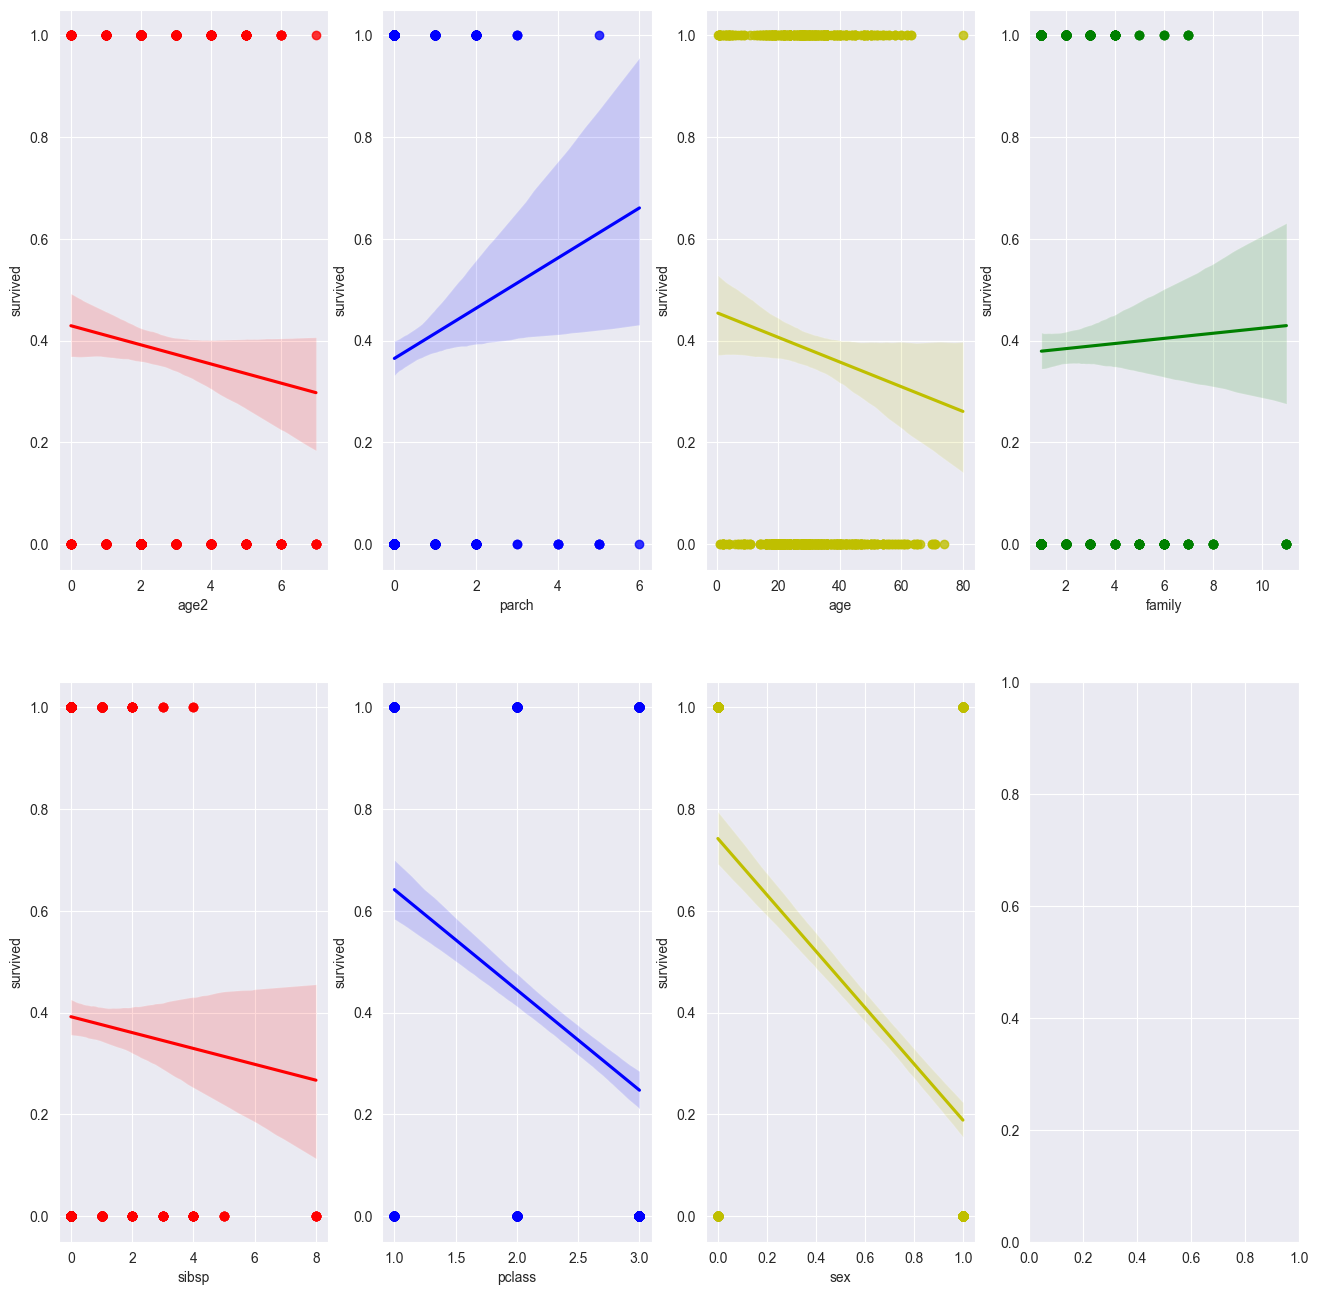

In [89]:
# 학습된 모델을 통해서, 예측값도 구하고, 실제값과 비교도하고, MSE R^2 , 평가 지표
# 학습된 모델의 예측값, 실제값과 얼마나 일치하는 지를 조사.
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지들을 , 2 x 3 , 표 형태로 나타내기.
fig, axs = plt.subplots(figsize = (16,16), ncols = 4, nrows = 2)

x_features = ["age2", "parch", "age", "family", "sibsp", "pclass", "sex"]

# 그래프의 색상 옵션
plot_color = ["r","b","y","g","r","b","y"]

for i, feature in enumerate(x_features):
  # 몫 -> 2개 행으로
  row = int(i/4)
  # 나머지 -> 0,1,2 반복
  col = i % 4
  sns.regplot(x = feature, y="survived", data = data_df, ax = axs[row][col], color = plot_color[i])